In [1]:
import os
import torch.nn as nn
import torch
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
dataset_folder = '/mnt/data/BraDD-S1TS_zenodo' # TODO: Download and unzip the dataset
meta_df = pandas.read_csv(os.path.join(dataset_folder, 'meta.csv'), index_col=0)

In [3]:
def read_sample(index: int) -> dict:
    file = meta_df['file'].iloc[index]
    return torch.load(os.path.join(dataset_folder, 'Samples', file), weights_only=False)

In [4]:
num_samples = 10
samples = [read_sample(i) for i in range(num_samples)]

# Inspect shapes
for i, sample in enumerate(samples):
    print(f"Sample {i}:")
    print("Image shape:", sample['image'].shape)  # e.g., (2, 48, 48) or (timesteps, 2, 48, 48)
    print("Label shape:", sample['label'].shape)  # e.g., (2, 48, 48)

Sample 0:
Image shape: torch.Size([31, 2, 48, 48])
Label shape: torch.Size([2, 48, 48])
Sample 1:
Image shape: torch.Size([25, 2, 48, 48])
Label shape: torch.Size([2, 48, 48])
Sample 2:
Image shape: torch.Size([33, 2, 48, 48])
Label shape: torch.Size([2, 48, 48])
Sample 3:
Image shape: torch.Size([30, 2, 48, 48])
Label shape: torch.Size([2, 48, 48])
Sample 4:
Image shape: torch.Size([31, 2, 48, 48])
Label shape: torch.Size([2, 48, 48])
Sample 5:
Image shape: torch.Size([31, 2, 48, 48])
Label shape: torch.Size([2, 48, 48])
Sample 6:
Image shape: torch.Size([31, 2, 48, 48])
Label shape: torch.Size([2, 48, 48])
Sample 7:
Image shape: torch.Size([31, 2, 48, 48])
Label shape: torch.Size([2, 48, 48])
Sample 8:
Image shape: torch.Size([32, 2, 48, 48])
Label shape: torch.Size([2, 48, 48])
Sample 9:
Image shape: torch.Size([30, 2, 48, 48])
Label shape: torch.Size([2, 48, 48])


In [5]:
class SimpleCNN(nn.Module):
    def __init__(self, out_channels=8):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(2, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, out_channels, kernel_size=3, padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        return self.conv(x)  # (batch_size, out_channels, H, W)

cnn = SimpleCNN()

Sample 0 CNN feature shape: torch.Size([31, 8, 48, 48])


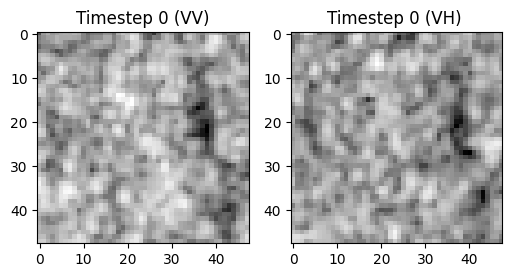

Sample 1 CNN feature shape: torch.Size([25, 8, 48, 48])


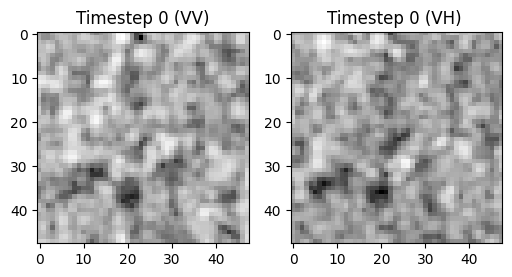

Sample 2 CNN feature shape: torch.Size([33, 8, 48, 48])


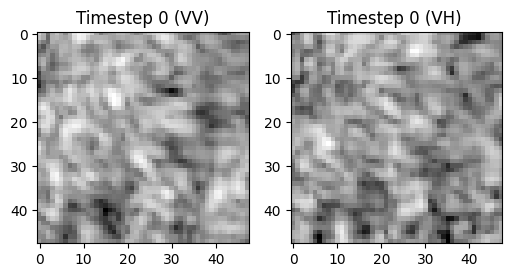

Sample 3 CNN feature shape: torch.Size([30, 8, 48, 48])


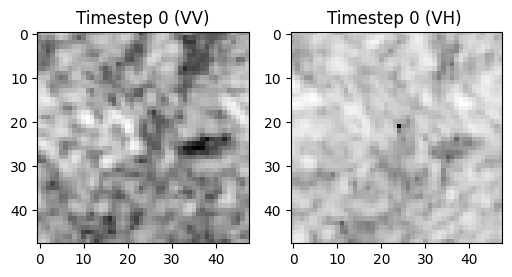

Sample 4 CNN feature shape: torch.Size([31, 8, 48, 48])


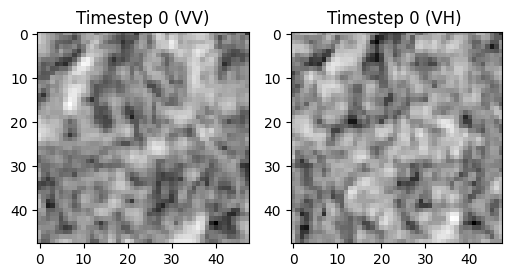

Sample 5 CNN feature shape: torch.Size([31, 8, 48, 48])


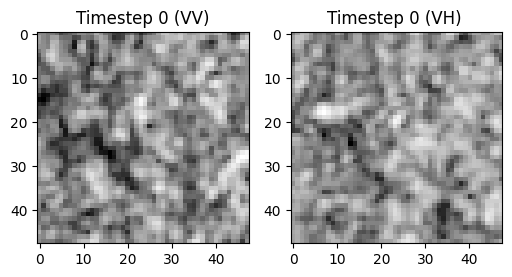

Sample 6 CNN feature shape: torch.Size([31, 8, 48, 48])


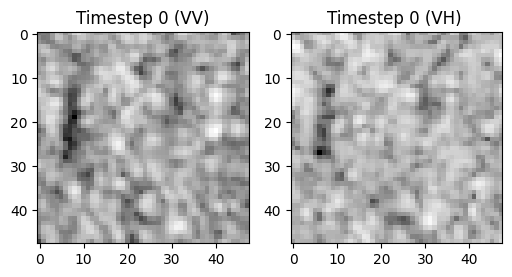

Sample 7 CNN feature shape: torch.Size([31, 8, 48, 48])


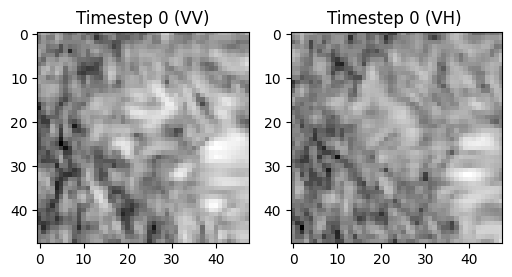

Sample 8 CNN feature shape: torch.Size([32, 8, 48, 48])


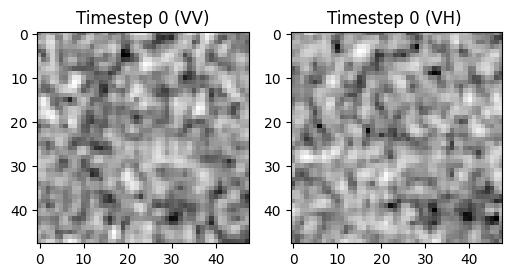

Sample 9 CNN feature shape: torch.Size([30, 8, 48, 48])


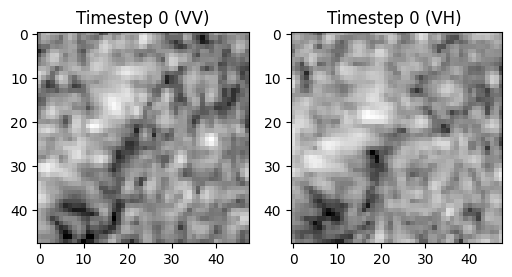

In [6]:
num_samples = 10
min_value = -50.0
max_value = 0.0

for idx in range(num_samples):
    sample = read_sample(idx)
    images = sample['image']
    labels = sample['label']

    # Normalize image values to [0,1]
    images_norm = torch.clamp((images - min_value) / (max_value - min_value), 0.0, 1.0)

    timesteps = images_norm.shape[0]
    batch_features = []
    
    
    for t in range(timesteps):
        x_t = images_norm[t].unsqueeze(0)  #add batch dim -> (1, 2, 48, 48)
        feat_t = cnn(x_t)                  #(1, out_channels, 48, 48)
        batch_features.append(feat_t.squeeze(0))  #remove batch dim

    #stac features
    batch_features = torch.stack(batch_features, dim=0)
    print(f"Sample {idx} CNN feature shape: {batch_features.shape}")

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(images_norm[0,0], cmap='gray')
    plt.title('Timestep 0 (VV)')
    plt.subplot(1,2,2)
    plt.imshow(images_norm[0,1], cmap='gray')
    plt.title('Timestep 0 (VH) ')
    plt.show()

Epoch 1, Sample 1, Loss: 0.7115
Epoch 1, Sample 2, Loss: 0.4285
Epoch 1, Sample 3, Loss: 0.3398
Epoch 1, Sample 4, Loss: 0.2646
Epoch 1, Sample 5, Loss: 0.2154
Epoch 1, Sample 6, Loss: 0.2016
Epoch 1, Sample 7, Loss: 0.1894
Epoch 1, Sample 8, Loss: 0.1738
Epoch 1, Sample 9, Loss: 0.1669
Epoch 1, Sample 10, Loss: 0.1519
Epoch 2, Sample 1, Loss: 0.1413
Epoch 2, Sample 2, Loss: 0.1397
Epoch 2, Sample 3, Loss: 0.1300
Epoch 2, Sample 4, Loss: 0.1273
Epoch 2, Sample 5, Loss: 0.1209
Epoch 2, Sample 6, Loss: 0.1172
Epoch 2, Sample 7, Loss: 0.1110
Epoch 2, Sample 8, Loss: 0.1081
Epoch 2, Sample 9, Loss: 0.1015
Epoch 2, Sample 10, Loss: 0.0968


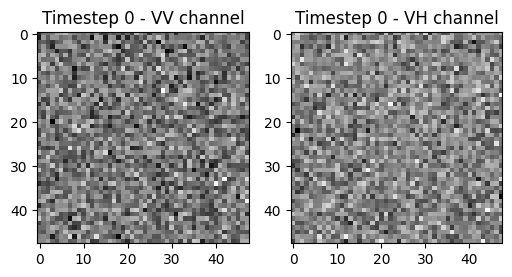

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# ---------------------------
# 1. Mock read_sample function
# ---------------------------
def read_sample(idx):
    # Simulate a sequence: 31 timesteps, 2 channels, 48x48
    image = torch.randn(31, 2, 48, 48) * -25.0  # SAR-like negative values
    label = torch.randint(0, 2, (2, 48, 48))    # old mask, new mask
    return {'image': image, 'label': label}

# ---------------------------
# 2. CNN for feature extraction
# ---------------------------
class SimpleCNN(nn.Module):
    def __init__(self, out_channels=8):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(2, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, out_channels, kernel_size=3, padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        return self.conv(x)  # (batch_size, out_channels, H, W)

# ---------------------------
# 3. CNN-LSTM hybrid
# ---------------------------
class CNNLSTM(nn.Module):
    def __init__(self, cnn_out_channels=8, lstm_hidden=32):
        super().__init__()
        self.cnn = SimpleCNN(out_channels=cnn_out_channels)
        # LSTM input size = cnn_out_channels * H * W
        self.lstm = nn.LSTM(input_size=cnn_out_channels*48*48,
                            hidden_size=lstm_hidden,
                            batch_first=True)
        self.fc = nn.Linear(lstm_hidden, 1)  # single output per sequence

    def forward(self, x):
        # x: (batch_size, timesteps, 2, 48, 48)
        batch_size, timesteps, C, H, W = x.shape
        cnn_features = []

        # Process each timestep through CNN
        for t in range(timesteps):
            x_t = x[:, t, :, :, :]           # (batch_size, 2, 48, 48)
            feat_map = self.cnn(x_t)         # (batch_size, cnn_out_channels, 48, 48)
            feat_flat = feat_map.view(batch_size, -1)  # flatten spatial dims
            cnn_features.append(feat_flat)

        # Stack features for LSTM: (batch_size, timesteps, cnn_features)
        lstm_input = torch.stack(cnn_features, dim=1)
        lstm_out, _ = self.lstm(lstm_input)
        output = self.fc(lstm_out[:, -1, :])  # use last timestep output
        return output

# ---------------------------
# 4. Small mock training loop
# ---------------------------
model = CNNLSTM()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_samples = 10
for epoch in range(2):  # just 2 epochs for mock EDA
    for idx in range(num_samples):
        sample = read_sample(idx)
        images = sample['image'].unsqueeze(0)  # add batch dim -> (1, 31, 2, 48, 48)
        labels = torch.tensor([0.0]).unsqueeze(0)  # dummy label

        # Normalize
        images = torch.clamp((images - -50.0) / 50.0, 0.0, 1.0)

        optimizer.zero_grad()
        preds = model(images)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()
        
        print(f"Epoch {epoch+1}, Sample {idx+1}, Loss: {loss.item():.4f}")

# ---------------------------
# 5. Optional: visualize first timestep VV & VH
# ---------------------------
sample0 = read_sample(0)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(sample0['image'][0,0], cmap='gray')
plt.title('Timestep 0 - VV channel')
plt.subplot(1,2,2)
plt.imshow(sample0['image'][0,1], cmap='gray')
plt.title('Timestep 0 - VH channel')
plt.show()

Sample 1, Loss: 0.6992
Sample 2, Loss: 0.6940
Sample 3, Loss: 0.6953
Sample 4, Loss: 0.6939
Sample 5, Loss: 0.6935
Sample 6, Loss: 0.6954
Sample 7, Loss: 0.6943
Sample 8, Loss: 0.6935
Sample 9, Loss: 0.6943
Sample 10, Loss: 0.6933


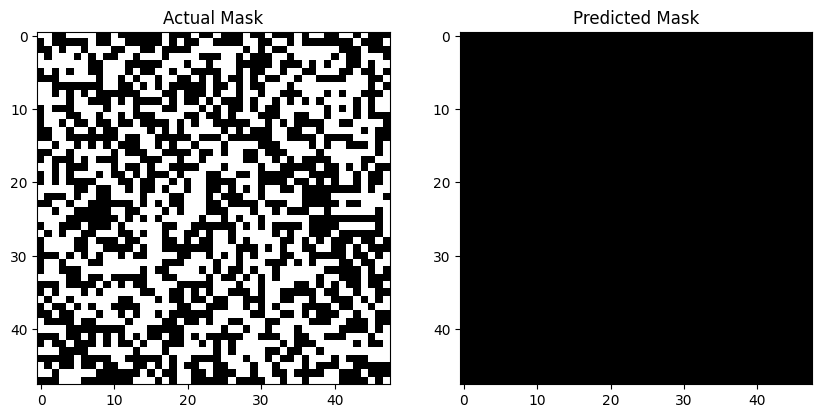

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class CNNFeatureExtractor(nn.Module):
    def __init__(self, out_channels=8):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(2, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, out_channels, kernel_size=3, padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        return self.conv(x)  # (batch_size, out_channels, H, W)

class CNNLSTM_Pixel(nn.Module):
    def __init__(self, cnn_channels=8, lstm_hidden=32):
        super().__init__()
        self.cnn = CNNFeatureExtractor(out_channels=cnn_channels)
        self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden, batch_first=True)
        self.fc = nn.Linear(lstm_hidden, 1)  # pixel-wise output

    def forward(self, x):
        batch_size, timesteps, C, H, W = x.shape
        pixel_seq = []

        # Extract CNN features per timestep
        for t in range(timesteps):
            x_t = x[:, t, :, :, :]               # (batch_size, 2, H, W)
            feat_map = self.cnn(x_t)             # (batch_size, cnn_channels, H, W)
            # Flatten spatial dims: (batch_size*H*W, cnn_channels)
            feat_flat = feat_map.permute(0,2,3,1).reshape(batch_size*H*W, -1)
            pixel_seq.append(feat_flat)

        # Stack timesteps: (batch_size*H*W, timesteps, cnn_channels)
        lstm_input = torch.stack(pixel_seq, dim=1)
        lstm_out, _ = self.lstm(lstm_input)      # (batch_size*H*W, timesteps, lstm_hidden)
        pixel_pred = self.fc(lstm_out[:, -1, :]) # last timestep
        pixel_pred = pixel_pred.view(batch_size, H, W)  # reshape back to mask
        return pixel_pred

model = CNNLSTM_Pixel()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_samples = 10  # tart with small batch for EDA
timesteps = 31

for idx in range(num_samples):
    sample = read_sample(idx)  # your actual dataset function
    images = sample['image'].unsqueeze(0)  # (1, 31, 2, 48, 48)
    labels = sample['label'][1].unsqueeze(0).float()  # (1, 48, 48)

    # Normalize VV & VH channels
    min_value, max_value = -50.0, 0.0
    images = torch.clamp((images - min_value) / (max_value - min_value), 0.0, 1.0)

    #foreward pass.
    optimizer.zero_grad()
    preds = model(images)  # (1, 48, 48)
    loss = criterion(preds, labels)
    loss.backward()
    optimizer.step()

    print(f"Sample {idx+1}, Loss: {loss.item():.4f}")

sample0 = read_sample(0)
images0 = torch.clamp((sample0['image'].unsqueeze(0) - min_value) / (max_value - min_value), 0.0, 1.0)
labels0 = sample['label'][1].unsqueeze(0).float()  # shape: (48*48,) or (48,)

with torch.no_grad():
    pred_mask = torch.sigmoid(model(images0)).squeeze(0)  # (48,48)

binary_pred = (pred_mask > 0.7).float()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(labels0.squeeze(), cmap='gray')
plt.title("Actual Mask")
plt.subplot(1,2,2)
plt.imshow(binary_pred.squeeze(), cmap='gray')
plt.title("Predicted Mask")
plt.show()

In [9]:
sample = torch.load(os.path.join(dataset_folder, 'Samples', meta_df['file'].iloc[0]) , weights_only=False)
print(sample.keys())          # should include 'image' and 'label'
print(sample['image'].shape)  # (31, 2, 48, 48)
print(sample['label'].shape)  # what is this? maybe (2,48) ?

dict_keys(['image_dates', 'label_dates', 'image', 'label'])
torch.Size([31, 2, 48, 48])
torch.Size([2, 48, 48])


In [10]:
sample0 = read_sample(0)
images0 = torch.clamp((sample0['image'].unsqueeze(0) - min_value) / (max_value - min_value), 0.0, 1.0)
labels0 = sample0['label'][1] # shape: (48*48,) or (48,)
labels0.shape

torch.Size([48, 48])

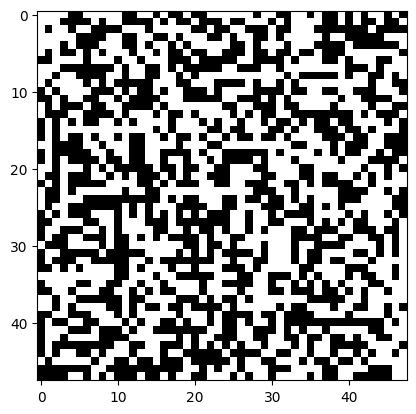

In [11]:
plt.imshow(labels0.squeeze(), cmap='gray')